This is the assignment as currently stands. Issues I'm having so far:
- Data displays correctly when the linear regression is commented out, but is condensed to a small point when added. This is probably due to the guesses used to feed curve_fit: both bGuess and aGuess are in the order of 10^7, which it seems to be multiplying so make the x,y axes 1e7,1e14. I can't tell if this is an issue of linearFit() or curve_fit.
- Not sure what the dense array is accomplishing in the voigt problem, my attempts to replicate it met only errors so I left it in but commented it out.
- The graph as is has a second Fit line and I have no idea where that's coming from. Commenting out the print.plot() for the fit removes both regressions (the blue one isn't even visible, maybe it's at a smaller scale?) 

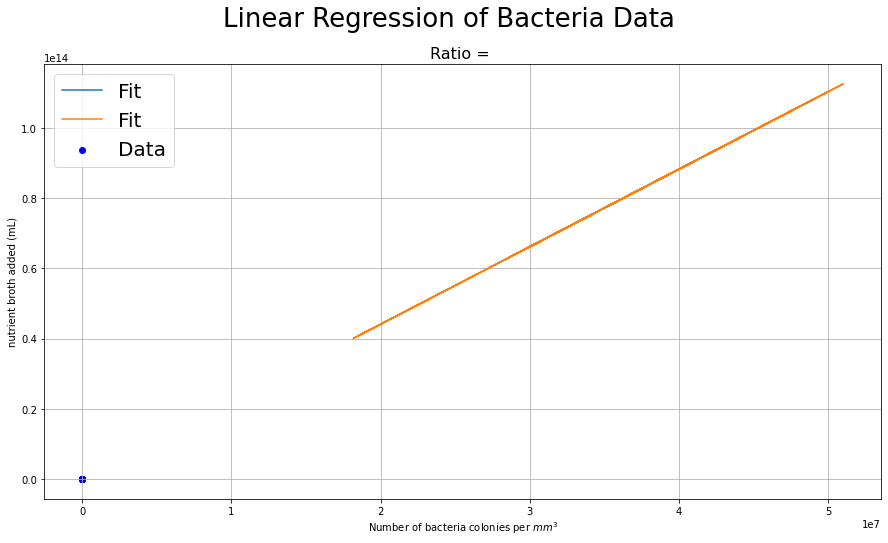

In [5]:
import scipy
import scipy.special as sps 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

###import data
data = np.loadtxt('/home/julian/Documents/DRPFiles/cellData.txt')

###x and y from array
xData = data[:,0]
yData = data[:,1]

###linear fit equation
def linearFit(x, a, b):
    return (a * x) + b

###guesses to feed to curve fit, as parameters are outside [=100,100] range
aGuess=(np.max(yData)-np.min(yData))/(np.max(xData)-np.min(xData)) #guess of the value for a, slope
bGuess=np.min(yData) #guess for b value, or the y-intercept
guess=[aGuess,bGuess] #list of all the guesses so we can feed it to curve_fit

###linear fit
param, pcov = scipy.optimize.curve_fit(linearFit,xData,yData,p0=guess)
paramError = np.sqrt(np.diag(pcov))

###Standard error, was in the middle of this so commented out for now
#x = 
#m = 
#b = 1.990160241473622620e+07

###display graph
#dataDense=np.linspace(data[0],data[10],num=1000) #make a new dense array so the fit plot looks nice
plt.figure(figsize=(15,8))
plt.suptitle("Linear Regression of Bacteria Data",fontsize=26) #super title
plt.title("Ratio = ",fontsize=16) #sub title
#plt.plot(dataDense,linearFit(dataDense,*params),label='Fit')
plt.plot(data,linearFit(data,*param),label='Fit')
plt.scatter(xData,yData,c='blue',label='Data')
plt.ylabel('nutrient broth added (mL)')
plt.xlabel('Number of bacteria colonies per $mm^3$')
plt.legend(prop={'size':20})
plt.grid()
plt.show()


###everything below here is for testing only
#print(data.shape)
#print(xData)
#print(aGuess)
#print(bGuess)